# Read model training logs:

In [1]:
import os, sys
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
from os.path import isfile, join
import os.path
from os import listdir
import glob
import matplotlib.pyplot as plt
from model_validation import model_validation
from sklearn.metrics import accuracy_score
import numpy as np
from prepare_data import data_split
import json

In [2]:
def ana_log_file(file):
    
    
    accuracy_train = []
    accuracy_val = []

    loss_train = []
    loss_val = []

    with open(file, "r") as mapping_file:
        lines = mapping_file.readlines()
        for line in lines:
    
            if line.find('training') != -1:
                #print(line_before)
                words = line.split()
                #print(words)
                
                if 'accuracy' in line_before:
                    accuracy_train.append(float(words[6][:-1]))
                    acc_flag = True
                elif 'Loss' in line_before:
                    loss_train.append(float(words[6][:-1]))
            
            if line.find('validation') != -1 and line.find('cur') != -1:
                #print(line_before)
                words = line.split()
                #print(words)
                
                if 'training' in line_before:
                    if acc_flag:
                        accuracy_val.append(float(words[6][:-1]))
                        acc_flag = False
                    else:
                        loss_val.append(float(words[6][:-1]))
                    
                
            line_before = line
    return accuracy_train, accuracy_val, loss_train, loss_val

In [3]:
def get_log_file(path):
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    
    log_files = []

    for ifile in onlyfiles:
        if ifile.find('.log') != -1:
            log_files.append(str(ifile))
                
    log_files = list( np.sort(np.array(log_files)) )
    return log_files

In [52]:
path = '/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/4_classes_data/log_files/resNet_50/'

files = get_log_file(path)
files

['resNet_50_v1_4cl_270deg_clipped.log',
 'resNet_50_v2_4cl_270deg_clipped.log',
 'resNet_50_v3_4cl_270deg_clipped.log',
 'resNet_50_v4_4cl_270deg_clipped.log']

In [62]:
accuracy_train = []
accuracy_val = []

loss_train = []
loss_val = []

for file in files:
    
    print(file)
    accuracy_train_tmp, accuracy_val_tmp, loss_train_tmp, loss_val_tmp = ana_log_file(path + file)
    
    accuracy_train = accuracy_train + accuracy_train_tmp
    accuracy_val = accuracy_val + accuracy_val_tmp
    loss_train = loss_train + loss_train_tmp
    loss_val = loss_val + loss_val_tmp
    

resNet_50_v1_4cl_270deg_clipped.log
resNet_50_v2_4cl_270deg_clipped.log
resNet_50_v3_4cl_270deg_clipped.log
resNet_50_v4_4cl_270deg_clipped.log


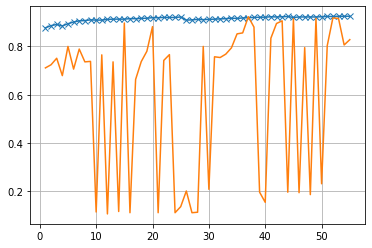

In [63]:
n_epoch = np.arange(1,len(accuracy_train)+1,1)

plt.plot(n_epoch, accuracy_train, 'x-')
plt.plot(n_epoch, accuracy_val, '-')
plt.grid()

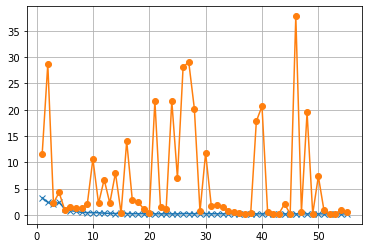

In [64]:
plt.plot(n_epoch, loss_train, 'x-')
plt.plot(n_epoch, loss_val, 'o-')
plt.grid()